In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import contractions
import pickle
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [207]:
roberta_train=pd.read_csv('output_bdc_train.csv',header=0)
roberta_test=pd.read_csv('output_bdc_test.csv',header=0)
bert_train=pd.read_csv('train_bert_occ_sidp.csv',header=0)
bert_test=pd.read_csv('test_bert_occ_sidp.csv',header=0)
liwc_train=pd.read_csv('train_liwc_occ_sidp.csv',header=0)
liwc_test=pd.read_csv('test_liwc_occ_sidp.csv',header=0)

In [208]:
roberta_train.head()

,PARTID,labels,pred
0,1001.0,0.000000,-0.010059
1,1002.0,0.222222,0.241211
2,1004.0,0.666667,0.722943
3,1007.0,0.111111,0.123928
4,1008.0,0.333333,0.279811


In [209]:
bert_train.head()

,0,preds,PARTID
0,2.0,0.514405,1002
1,0.0,0.507496,1004
2,2.0,0.681055,1007
3,2.0,0.587815,1008
4,0.0,0.572235,1009


In [210]:
liwc_train.head()

,0,preds,PARTID
0,2.0,0.492334,1002
1,0.0,0.705881,1004
2,2.0,0.784990,1007
3,2.0,0.553015,1008
4,0.0,0.635716,1009


In [211]:
print("roberta_train",roberta_train.shape)
print("bert_train",bert_train.shape)
print("liwc_train",liwc_train.shape)
print("roberta_test",roberta_test.shape)
print("bert_test",bert_test.shape)
print("liwc_test",liwc_test.shape)

roberta_train (1097, 3)
bert_train (800, 3)
liwc_train (800, 3)
roberta_test (275, 3)
bert_test (254, 3)
liwc_test (254, 3)


In [212]:
train_set=pd.merge(bert_train,liwc_train,on='PARTID',how='inner')

test_set=pd.merge(bert_test,liwc_test,on='PARTID',how='inner')

In [169]:
train_set=pd.merge(liwc_train,bert_train,on='PARTID',how='inner')
train_set=pd.merge(roberta_train,train_set,on='PARTID',how='inner')

test_set=pd.merge(liwc_test,bert_test,on='PARTID',how='inner')
test_set=pd.merge(roberta_test,test_set,on='PARTID',how='inner')

In [213]:
print("train_set",train_set.shape)
print("test_set",test_set.shape)

train_set (800, 5)
test_set (254, 5)


In [214]:
train_set.head()

,0_x,preds_x,PARTID,0_y,preds_y
0,2.0,0.514405,1002,2.0,0.492334
1,0.0,0.507496,1004,0.0,0.705881
2,2.0,0.681055,1007,2.0,0.784990
3,2.0,0.587815,1008,2.0,0.553015
4,0.0,0.572235,1009,0.0,0.635716


In [160]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.asarray(train_set.iloc[:,3]).reshape(-1, 1))
print(X_scaled)
X_original = scaler.inverse_transform(np.asarray(train_set.iloc[:,2]).reshape(-1, 1))
print(X_original)
train_set['roberta']=X_original

[[-0.33773065]
 [ 2.67012467]
 [-0.33773065]
 [ 1.16619701]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [ 1.16619701]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [ 1.16619701]
 [-0.33773065]
 [ 1.16619701]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [ 1.16619701]
 [-0.33773065]
 [ 2.67012467]
 [ 1.16619701]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [ 1.16619701]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [ 1.16619701]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [-0.33773065]
 [ 5.67797

In [161]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.asarray(test_set.iloc[:,3]).reshape(-1, 1))
print(X_scaled)
X_original = scaler.inverse_transform(np.asarray(test_set.iloc[:,2]).reshape(-1, 1))
print(X_original)
test_set['roberta']=X_original

[[-0.25507301]
 [-0.25507301]
 [ 1.63064532]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [ 1.63064532]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [ 1.63064532]
 [-0.25507301]
 [ 1.63064532]
 [-0.25507301]
 [ 3.51636364]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [ 1.63064532]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [ 1.63064532]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [-0.25507301]
 [ 1.63064532]
 [-0.25507301]
 [-0.25507

In [215]:
train_set.head()

,0_x,preds_x,PARTID,0_y,preds_y
0,2.0,0.514405,1002,2.0,0.492334
1,0.0,0.507496,1004,0.0,0.705881
2,2.0,0.681055,1007,2.0,0.784990
3,2.0,0.587815,1008,2.0,0.553015
4,0.0,0.572235,1009,0.0,0.635716


In [216]:
test_set.head()

,0_x,preds_x,PARTID,0_y,preds_y
0,2,0.488950,4179,2,0.582336
1,0,0.374769,4181,0,0.564198
2,2,0.664268,4182,2,0.543091
3,1,0.453075,4183,1,0.509556
4,1,0.510318,4184,1,0.577617


In [217]:
# Initialize the linear regression model
model = LinearRegression()

In [218]:
# Train the model
model.fit(train_set.iloc[:,[1,4]], train_set.iloc[:,3])

LinearRegression()

In [120]:
# Train the model
model.fit(train_set.iloc[:,[4,6,7]], train_set.iloc[:,3])

LinearRegression()

In [175]:
# Train the model
model.fit(train_set.iloc[:,[2,4,6]], train_set.iloc[:,3])

LinearRegression()

In [219]:
# Coefficients (slope and intercept)
print(f"Intercept: {model.intercept_}, Slope: {model.coef_}")

Intercept: -1.5378716455136159, Slope: [2.18408514 1.86905334]


In [220]:
# Predictions for input X
y_pred = model.predict(test_set.iloc[:,[1,4]])

In [177]:
# Predictions for input X
y_pred = model.predict(test_set.iloc[:,[2,4,6]])

In [221]:
r2 = r2_score(test_set.iloc[:,3],y_pred)
print(f'R^2 Score: {r2:.4f}')

R^2 Score: -0.0579


In [222]:
x_pred = model.predict(train_set.iloc[:,[1,4]])

In [223]:
r2 = r2_score(train_set.iloc[:,3],x_pred)
print(f'R^2 Score: {r2:.4f}')

R^2 Score: 0.1241


In [224]:
inp=pd.DataFrame()
inp['labels'] = test_set.iloc[:,3]
inp['preds']=np.asarray(y_pred)
inp['PARTID']=np.asarray(test_set.iloc[:,2])

In [225]:
out=pd.DataFrame()
out['labels'] = train_set.iloc[:,3]
out['preds']=np.asarray(x_pred)
out['PARTID']=np.asarray(train_set.iloc[:,2])

In [226]:
inp.shape

(254, 3)

In [227]:
inp.head()

,labels,preds,PARTID
0,2,0.618453,4179
1,0,0.335171,4181
2,2,0.928012,4182
3,1,0.404070,4183
4,1,0.656303,4184


In [228]:
out.to_csv('train_occ.csv',index=False)
inp.to_csv('test_occ.csv',index=False)

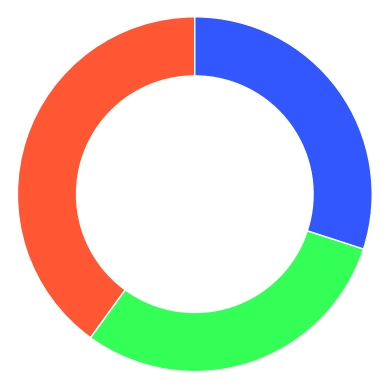

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Define the three numbers normalized to sum to 1
numbers = [0.4, 0.3, 0.3]  # These are the proportions, adjust as needed

# Define colors for each section (e.g., Red, Green, Blue)
colors = ['#FF5733', '#33FF57', '#3357FF']

# Create a pie chart and remove the center to make it a ring
fig, ax = plt.subplots()

# Draw the pie chart
ax.pie(numbers, colors=colors, startangle=90, radius=1.2, wedgeprops=dict(width=0.4, edgecolor='w'))

# Equal aspect ratio ensures the pie chart is circular.
ax.set_aspect('equal')

# Display the plot
plt.show()

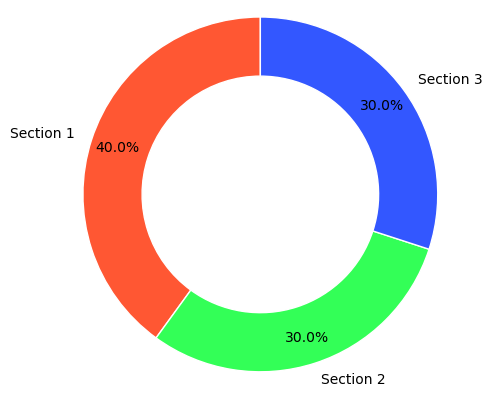

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Define the three numbers normalized to sum to 1
numbers = [0.4, 0.3, 0.3]  # These are the proportions, adjust as needed

# Define colors for each section (e.g., Red, Green, Blue)
colors = ['#FF5733', '#33FF57', '#3357FF']

# Define labels for each section
labels = ['Section 1', 'Section 2', 'Section 3']

# Create a pie chart and remove the center to make it a ring
fig, ax = plt.subplots()

# Draw the pie chart
ax.pie(numbers, colors=colors, startangle=90, radius=1.2, 
       wedgeprops=dict(width=0.4, edgecolor='w'),
       labels=labels, autopct='%1.1f%%', pctdistance=0.85)

# Equal aspect ratio ensures the pie chart is circular.
ax.set_aspect('equal')

# Display the plot
plt.show()

In [180]:
import pandas as pd
from upsetplot import UpSet
import matplotlib.pyplot as plt

# Create dictionaries for each category
top_positive_dict = {
    'SIDPOCC_Positive': [120, 58, 91, 0, 22, 54, 76, 62, 31, 3],
    'SIDPBDC_Positive': [53, 92, 31, 102, 5, 118, 13, 117, 143, 121],
    'SIDPSZC_Positive': [3, 68, 80, 10, 49, 15, 111, 134, 98, 76],
    'PNEOA_scaled_Positive': [54, 12, 93, 55, 135, 1, 18, 4, 104, 86],
    'PNEOC_scaled_Positive': [48, 93, 8, 54, 81, 23, 122, 49, 71, 123],
    'PNEOE_scaled_Positive': [32, 107, 48, 115, 122, 19, 144, 1, 82, 30],
    'PNEOO_scaled_Positive': [8, 22, 82, 116, 122, 44, 46, 130, 93, 39],
    'PNEON_scaled_Positive': [31, 13, 40, 5, 41, 4, 110, 146, 62, 102]
}

# Combine all unique IDs into a list
all_ids = list(set().union(*top_positive_dict.values()))

# Create a binary matrix representing the presence of each ID in each category
binary_data = {key: [val in values for val in all_ids] for key, values in top_positive_dict.items()}
df = pd.DataFrame(binary_data, index=all_ids)
print(df.head())
# Ensure the DataFrame is in boolean format
df = df.astype(bool)
print("====================")
print(df.head())

print("====================")
print(df.head())
# Create the UpSet plot using the generated series
upset = UpSet(df, subset_size='count', show_counts=True)
upset.plot()
plt.title('Overlap of Top Positive Metrics Across Categories')
plt.show()


     SIDPOCC_Positive  SIDPBDC_Positive  SIDPSZC_Positive  \
0                True             False             False   
1               False             False             False   
130             False             False             False   
3                True             False              True   
4               False             False             False   

     PNEOA_scaled_Positive  PNEOC_scaled_Positive  PNEOE_scaled_Positive  \
0                    False                  False                  False   
1                     True                  False                   True   
130                  False                  False                  False   
3                    False                  False                  False   
4                     True                  False                  False   

     PNEOO_scaled_Positive  PNEON_scaled_Positive  
0                    False                  False  
1                    False                  False  
130                 

AttributeError: 'Index' object has no attribute 'levels'

In [182]:
import pandas as pd

# Positive and negative p-values for each category
data = {
    'SIDPOCC': {
        'Positive': [120, 58, 91, 0],
        'Negative': [52, 30]
    },
    'SIDPBDC': {
        'Positive': [53, 92, 31, 102, 5],
        'Negative': []
    },
    'SIDPSZC': {
        'Positive': [3],
        'Negative': [8]
    },
    'PNEOA_scaled': {
        'Positive': [54, 12, 93, 55],
        'Negative': [3, 22]
    },
    'PNEOC_scaled': {
        'Positive': [],
        'Negative': [5]
    },
    'PNEOE_scaled': {
        'Positive': [32],
        'Negative': [92]
    },
    'PNEOO_scaled': {
        'Positive': [8],
        'Negative': [143]
    },
    'PNEON_scaled': {
        'Positive': [31, 13],
        'Negative': []
    }
}

# List to collect rows for DataFrame
rows = []

for category, values in data.items():
    for pos in values['Positive']:
        rows.append({'Category': category, 'Positive': pos, 'Negative': None})
    for neg in values['Negative']:
        rows.append({'Category': category, 'Positive': None, 'Negative': neg})

# Create a DataFrame from the list of rows
overlap_df = pd.DataFrame(rows)

# Display the resulting DataFrame
print(overlap_df)


        Category  Positive  Negative
0        SIDPOCC     120.0       NaN
1        SIDPOCC      58.0       NaN
2        SIDPOCC      91.0       NaN
3        SIDPOCC       0.0       NaN
4        SIDPOCC       NaN      52.0
5        SIDPOCC       NaN      30.0
6        SIDPBDC      53.0       NaN
7        SIDPBDC      92.0       NaN
8        SIDPBDC      31.0       NaN
9        SIDPBDC     102.0       NaN
10       SIDPBDC       5.0       NaN
11       SIDPSZC       3.0       NaN
12       SIDPSZC       NaN       8.0
13  PNEOA_scaled      54.0       NaN
14  PNEOA_scaled      12.0       NaN
15  PNEOA_scaled      93.0       NaN
16  PNEOA_scaled      55.0       NaN
17  PNEOA_scaled       NaN       3.0
18  PNEOA_scaled       NaN      22.0
19  PNEOC_scaled       NaN       5.0
20  PNEOE_scaled      32.0       NaN
21  PNEOE_scaled       NaN      92.0
22  PNEOO_scaled       8.0       NaN
23  PNEOO_scaled       NaN     143.0
24  PNEON_scaled      31.0       NaN
25  PNEON_scaled      13.0       NaN


In [183]:
import pandas as pd

# Create dictionaries for each category with p-values
top_positive_dict = {
    'SIDPOCC_Positive': [120, 58, 91, 0],
    'SIDPBDC_Positive': [53, 92, 31, 102, 5],
    'SIDPSZC_Positive': [3],
    'PNEOA_scaled_Positive': [54, 12, 93, 55],
    'PNEOC_scaled_Positive': [],
    'PNEOE_scaled_Positive': [32],
    'PNEOO_scaled_Positive': [8],
    'PNEON_scaled_Positive': [31, 13]
}

top_negative_dict = {
    'SIDPOCC_Negative': [52, 30],
    'SIDPBDC_Negative': [],
    'SIDPSZC_Negative': [8],
    'PNEOA_scaled_Negative': [3, 22],
    'PNEOC_scaled_Negative': [5],
    'PNEOE_scaled_Negative': [92],
    'PNEOO_scaled_Negative': [143],
    'PNEON_scaled_Negative': []
}

# Combine all unique IDs into a list
all_ids = list(set().union(*top_positive_dict.values(), *top_negative_dict.values()))

# Create a binary matrix representing the presence of each ID in each category
binary_data = {key: [val in values for val in all_ids] for key, values in {**top_positive_dict, **top_negative_dict}.items()}
df = pd.DataFrame(binary_data, index=all_ids)

# Filter DataFrame to include only values with p < 0.01 (for demonstration, I will use the p-values you provided)
# Here you can replace the conditions with the actual p-values you have for each ID if necessary
p_values = {
    120: 0.000550,
    58: 0.001448,
    91: 0.001958,
    0: 0.010040,
    22: 0.014274,
    54: 0.015700,
    76: 0.017701,
    62: 0.024923,
    31: 0.027732,
    3: 0.030935,
    52: 0.021039,
    30: 0.048179,
    81: 0.093699,
    11: 0.098695,
    71: 0.123323,
    129: 0.146067,
    69: 0.146764,
    24: 0.160197,
    121: 0.162731,
    53: 0.000070,
    92: 0.000135,
    31: 0.000543,
    102: 0.000672,
    5: 0.001508,
    # Add other IDs and p-values here...
}

# Filter the DataFrame to keep only IDs with p < 0.01
filtered_ids = [id_ for id_, p_val in p_values.items() if p_val < 0.01]
df_filtered = df.loc[filtered_ids]

# Display the resulting DataFrame
print(df_filtered)


     SIDPOCC_Positive  SIDPBDC_Positive  SIDPSZC_Positive  \
120              True             False             False   
58               True             False             False   
91               True             False             False   
31              False              True             False   
53              False              True             False   
92              False              True             False   
102             False              True             False   
5               False              True             False   

     PNEOA_scaled_Positive  PNEOC_scaled_Positive  PNEOE_scaled_Positive  \
120                  False                  False                  False   
58                   False                  False                  False   
91                   False                  False                  False   
31                   False                  False                  False   
53                   False                  False                  Fal

In [184]:
df_filtered.shape

(8, 16)

In [186]:
df

,SIDPOCC_Positive,SIDPBDC_Positive,SIDPSZC_Positive,PNEOA_scaled_Positive,PNEOC_scaled_Positive,PNEOE_scaled_Positive,PNEOO_scaled_Positive,PNEON_scaled_Positive,SIDPOCC_Negative,SIDPBDC_Negative,SIDPSZC_Negative,PNEOA_scaled_Negative,PNEOC_scaled_Negative,PNEOE_scaled_Negative,PNEOO_scaled_Negative,PNEON_scaled_Negative
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
12,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
22,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
30,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
31,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [187]:
final_results = {
    "Top Positive SIDPOCC": {
        120: 0.00055,
        58: 0.001448,
        91: 0.001958
    },
    "Top Negative SIDPOCC": {},
    "Top Positive SIDPBDC": {
        53: 0.000070,
        92: 0.000135,
        31: 0.000543,
        102: 0.000672,
        5: 0.001508
    },
    "Top Negative SIDPBDC": {},
    "Top Positive SIDPSZC": {
        3: 0.000008,
        68: 0.003454
    },
    "Top Negative SIDPSZC": {},
    "Top Positive PNEOA_scaled": {
        54: 0.002225,
        12: 0.002552,
        93: 0.004075
    },
    "Top Negative PNEOA_scaled": {
        3: 0.000550
    },
    "Top Positive PNEOC_scaled": {},
    "Top Negative PNEOC_scaled": {
        5: 0.001881,
        13: 0.001965
    },
    "Top Positive PNEOE_scaled": {
        32: 0.001479
    },
    "Top Negative PNEOE_scaled": {
        92: 0.001965
    },
    "Top Positive PNEOO_scaled": {
        8: 0.000061,
        22: 0.000119,
        82: 0.000444
    },
    "Top Negative PNEOO_scaled": {},
    "Top Positive PNEON_scaled": {
        31: 0.000018,
        13: 0.001350,
        40: 0.002149,
        5: 0.002458
    },
    "Top Negative PNEON_scaled": {}
}


In [190]:
import pandas as pd

# Initialize an empty set to collect all IDs
all_ids = set()

# Populate the set with IDs from the final_results dictionary
for category, values in final_results.items():
    all_ids.update(values.keys())

# Create a binary matrix for the overlap
overlap_data = {category: [1 if id in values else 0 for id in all_ids] for category, values in final_results.items()}

# Create the DataFrame
overlap_df = pd.DataFrame(overlap_data, index=sorted(all_ids))

# Display the DataFrame
print(overlap_df)
overlap_df['Count'] = overlap_df.sum(axis=1)

# Display the updated DataFrame
print(overlap_df)


     Top Positive SIDPOCC  Top Negative SIDPOCC  Top Positive SIDPBDC  \
3                       0                     0                     0   
5                       0                     0                     1   
8                       0                     0                     0   
12                      0                     0                     0   
13                      0                     0                     0   
22                      0                     0                     0   
31                      0                     0                     1   
32                      0                     0                     0   
40                      0                     0                     0   
53                      0                     0                     1   
54                      0                     0                     0   
58                      1                     0                     0   
68                      0                     0    

In [191]:
overlap_df

,Top Positive SIDPOCC,Top Negative SIDPOCC,Top Positive SIDPBDC,Top Negative SIDPBDC,Top Positive SIDPSZC,Top Negative SIDPSZC,Top Positive PNEOA_scaled,Top Negative PNEOA_scaled,Top Positive PNEOC_scaled,Top Negative PNEOC_scaled,Top Positive PNEOE_scaled,Top Negative PNEOE_scaled,Top Positive PNEOO_scaled,Top Negative PNEOO_scaled,Top Positive PNEON_scaled,Top Negative PNEON_scaled,Count
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2
5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,3
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
22,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2
32,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
53,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [192]:
overlap_df=overlap_df[overlap_df['Count']>1]

In [193]:
overlap_df

,Top Positive SIDPOCC,Top Negative SIDPOCC,Top Positive SIDPBDC,Top Negative SIDPBDC,Top Positive SIDPSZC,Top Negative SIDPSZC,Top Positive PNEOA_scaled,Top Negative PNEOA_scaled,Top Positive PNEOC_scaled,Top Negative PNEOC_scaled,Top Positive PNEOE_scaled,Top Negative PNEOE_scaled,Top Positive PNEOO_scaled,Top Negative PNEOO_scaled,Top Positive PNEON_scaled,Top Negative PNEON_scaled,Count
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2
5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,3
13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2
92,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2


[0.2579100393364118, 0.32170343766033865, 0.4203865230032496]


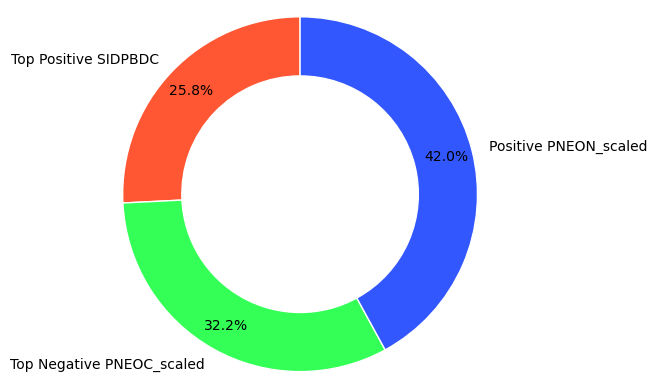

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# Define the three numbers normalized to sum to 1
numbers = [0.4, 0.3, 0.3]  # These are the proportions, adjust as needed

# Define colors for each section (e.g., Red, Green, Blue)
colors = ['#FF5733', '#33FF57', '#3357FF']

# Define labels for each section
labels = ['Top Positive SIDPBDC', 'Top Negative PNEOC_scaled', 'Positive PNEON_scaled']
def normalize_list(lst):
    total = sum(lst)
    return [x / total for x in lst]

values =[0.001508, 0.001881,0.002458]
normalized_list = normalize_list(values)

print(normalized_list)

# Create a pie chart and remove the center to make it a ring
fig, ax = plt.subplots()

# Draw the pie chart
ax.pie(normalized_list, colors=colors, startangle=90, radius=1.2, 
       wedgeprops=dict(width=0.4, edgecolor='w'),
       labels=labels, autopct='%1.1f%%', pctdistance=0.85)

# Equal aspect ratio ensures the pie chart is circular.
ax.set_aspect('equal')

# Display the plot
plt.show()

In [198]:
top_positive_dict = {
    'SIDPOCC_Positive': [120, 58, 91, 0, 22, 54, 76, 62, 31, 3],
    'SIDPBDC_Positive': [53, 92, 31, 102, 5, 118, 13, 117, 143, 121],
    'SIDPSZC_Positive': [3, 68, 80, 10, 49, 15, 111, 134, 98, 76],
    'PNEOA_scaled_Positive': [54, 12, 93, 55],
    'PNEOC_scaled_Positive': [48],
    'PNEOE_scaled_Positive': [32],
    'PNEOO_scaled_Positive': [8, 22],
    'PNEON_scaled_Positive': [31, 13, 40, 5, 41, 4, 110, 146, 62]
}

# Updated dictionary for negatives
top_negative_dict = {
    'SIDPOCC_Negative': [],
    'SIDPBDC_Negative': [],
    'SIDPSZC_Negative': [],
    'PNEOA_scaled_Negative': [3, 22, 31, 19],
    'PNEOC_scaled_Negative': [5, 13],
    'PNEOE_scaled_Negative': [92],
    'PNEOO_scaled_Negative': [],
    'PNEON_scaled_Negative': [23, 8]
}

In [200]:
import pandas as pd

# Combine positive and negative dictionaries
all_dicts = {**top_positive_dict, **top_negative_dict}

# Create a list of all unique IDs
all_ids = list(set(value for values in all_dicts.values() for value in values))

# Create a binary matrix representing presence of each ID in each category
overlap_data = {key: [val in values for val in all_ids] for key, values in all_dicts.items()}

# Create the DataFrame
overlap_df = pd.DataFrame(overlap_data, index=all_ids).astype(int)

# Display the overlap DataFrame
print(overlap_df)


     SIDPOCC_Positive  SIDPBDC_Positive  SIDPSZC_Positive  \
0                   1                 0                 0   
3                   1                 0                 1   
4                   0                 0                 0   
5                   0                 1                 0   
134                 0                 0                 1   
8                   0                 0                 0   
10                  0                 0                 1   
12                  0                 0                 0   
13                  0                 1                 0   
143                 0                 1                 0   
15                  0                 0                 1   
146                 0                 0                 0   
19                  0                 0                 0   
22                  1                 0                 0   
23                  0                 0                 0   
31                  1   

In [201]:
import pandas as pd

# Updated dictionary for positives
top_positive_dict = {
    'SIDPOCC_Positive': [120, 58, 91, 0, 22, 54, 76, 62, 31, 3],
    'SIDPBDC_Positive': [53, 92, 31, 102, 5, 118, 13, 117, 143, 121],
    'SIDPSZC_Positive': [3, 68, 80, 10, 49, 15, 111, 134, 98, 76],
    'PNEOA_scaled_Positive': [54, 12, 93, 55],
    'PNEOC_scaled_Positive': [48],
    'PNEOE_scaled_Positive': [32],
    'PNEOO_scaled_Positive': [8, 22],
    'PNEON_scaled_Positive': [31, 13, 40, 5, 41, 4, 110, 146, 62]
}

# Updated dictionary for negatives
top_negative_dict = {
    'SIDPOCC_Negative': [],
    'SIDPBDC_Negative': [],
    'SIDPSZC_Negative': [],
    'PNEOA_scaled_Negative': [3, 22, 31, 19],
    'PNEOC_scaled_Negative': [5, 13],
    'PNEOE_scaled_Negative': [92],
    'PNEOO_scaled_Negative': [],
    'PNEON_scaled_Negative': [23, 8]
}

# Combine positive and negative dictionaries
all_dicts = {**top_positive_dict, **top_negative_dict}

# Create a list of all unique IDs
all_ids = list(set(value for values in all_dicts.values() for value in values))

# Create a binary matrix representing presence of each ID in each category
overlap_data = {key: [val in values for val in all_ids] for key, values in all_dicts.items()}

# Create the DataFrame
overlap_df = pd.DataFrame(overlap_data, index=all_ids).astype(int)

# Add count variable as the sum of each row
overlap_df['count'] = overlap_df.sum(axis=1)

# Display the overlap DataFrame with count
print(overlap_df)


     SIDPOCC_Positive  SIDPBDC_Positive  SIDPSZC_Positive  \
0                   1                 0                 0   
3                   1                 0                 1   
4                   0                 0                 0   
5                   0                 1                 0   
134                 0                 0                 1   
8                   0                 0                 0   
10                  0                 0                 1   
12                  0                 0                 0   
13                  0                 1                 0   
143                 0                 1                 0   
15                  0                 0                 1   
146                 0                 0                 0   
19                  0                 0                 0   
22                  1                 0                 0   
23                  0                 0                 0   
31                  1   

In [202]:
overlap_df

,SIDPOCC_Positive,SIDPBDC_Positive,SIDPSZC_Positive,PNEOA_scaled_Positive,PNEOC_scaled_Positive,PNEOE_scaled_Positive,PNEOO_scaled_Positive,PNEON_scaled_Positive,SIDPOCC_Negative,SIDPBDC_Negative,SIDPSZC_Negative,PNEOA_scaled_Negative,PNEOC_scaled_Negative,PNEOE_scaled_Negative,PNEOO_scaled_Negative,PNEON_scaled_Negative,count
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3
134,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2
10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
13,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3
143,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [204]:
overlap_df=overlap_df[overlap_df['count']>1]

In [206]:
overlap_df.to_csv('overlap.csv',index=False)